# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://github.com/UBC-CS/cpsc330-2024s/tree/main/lectures) 
**See PrairieLearn for _due date_ and _submission_**


## Imports 

In [1]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Instructions
<hr>

_Points: 6_

Follow the [CPSC 330 homework instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md), which include information on how to do your assignment and how to submit your assignment. 

**You <u>may</u> work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- You can also work on your own if you prefer.
- The maximum group size is 2.
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 

_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

<br><br>

## Exercise 1: Introducing the dataset
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` under the data folder in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [2]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape

(32561, 15)

<br><br>

### 1.1 Data splitting 

_Points: 2_

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 40%/60% split because running cross-validation with this dataset can take a while on a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the model performance!_

<div class="alert alert-warning">

Solution_1.1
    
</div>

In [3]:
train_df, test_df = train_test_split(census_df, test_size=0.6, random_state=321)

display(train_df)
display(test_df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
27077,50,Federal-gov,32801,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,Amer-Indian-Eskimo,Female,0,0,40,United-States,>50K
11750,36,Local-gov,357720,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
278,32,Private,260954,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2042,30,United-States,<=50K
12950,45,Private,162494,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,19,United-States,<=50K
30767,43,Private,87284,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,31,?,672412,11th,7,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
11039,70,Private,220589,Some-college,10,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,12,United-States,<=50K
4220,21,Local-gov,309348,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,594,0,4,United-States,<=50K
6682,48,Private,75104,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
6860,21,Private,194723,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,Mexico,<=50K
18542,47,Private,168262,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
10365,19,Private,151506,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
15177,36,Self-emp-not-inc,207202,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
28303,44,Private,162108,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11360,24,Private,218678,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,49,United-States,<=50K
7944,23,Private,208598,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
1191,27,Private,37250,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1651,40,United-States,<=50K
3664,50,Private,767403,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,40,United-States,>50K


<br><br>

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [4]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32545,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32548,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [5]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [6]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32545,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32548,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 2.1 `describe()` method

_Points: 5_

**Your tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `census_summary`.
2. What is the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
3. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
4. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
5. Store the column names of all numeric-looking columns as a list in a variable called `numeric_cols`.  

<div class="alert alert-warning">

Solution_2.1
    
</div>

In [7]:
census_summary = train_df.describe(include='all')
display(census_summary)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,13024.000000,12321,1.302400e+04,13024,13024.000000,13024,12318,13024,13024,13024,13024.000000,13024.000000,13024.000000,12793,13024
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,9013,NaN,4159,NaN,6032,1711,5293,11116,8738,NaN,NaN,NaN,11671,9897
mean,38.662393,NaN,1.907179e+05,NaN,10.078471,NaN,NaN,NaN,NaN,NaN,1086.315802,89.842598,40.439573,NaN,NaN
std,13.672609,NaN,1.051823e+05,NaN,2.598469,NaN,NaN,NaN,NaN,NaN,7492.993855,408.695971,12.389735,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.183565e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.793685e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.391635e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
max_hours_per_week = census_summary["hours.per.week"].loc["max"]

print(f"The max hours one person worked per week is {max_hours_per_week}")

The max hours one person worked per week is 99.0


In [9]:
most_freq_occupation = "Prof-specialty"

print(f"Most frequent occupation is {most_freq_occupation}")

Most frequent occupation is Prof-specialty


In [10]:
missing_vals_cols = train_df.columns[train_df.isnull().any()].tolist()
print(missing_vals_cols)
numeric_cols = train_df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)


['workclass', 'occupation', 'native.country']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


<br><br>

<!-- BEGIN QUESTION -->

### 2.2 Visualizing features

_Points: 5_

**Your tasks:**

1. Visualize the histograms of numeric features.  
2. From the visualizations, which features seem relevant for the given prediction task?

<div class="alert alert-warning">

Solution_2.2
    
</div>

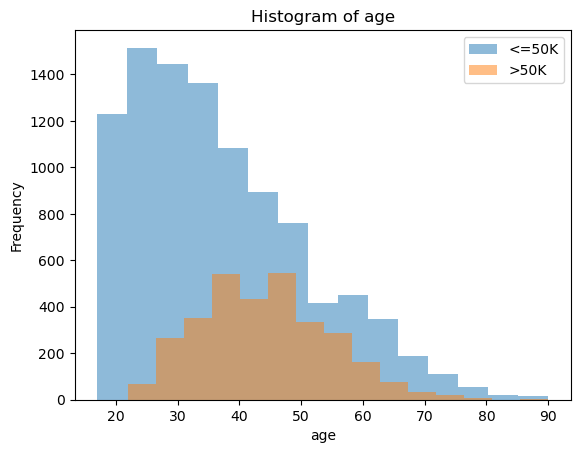

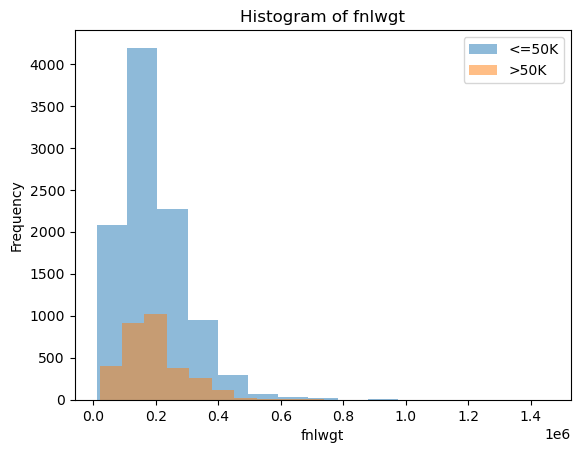

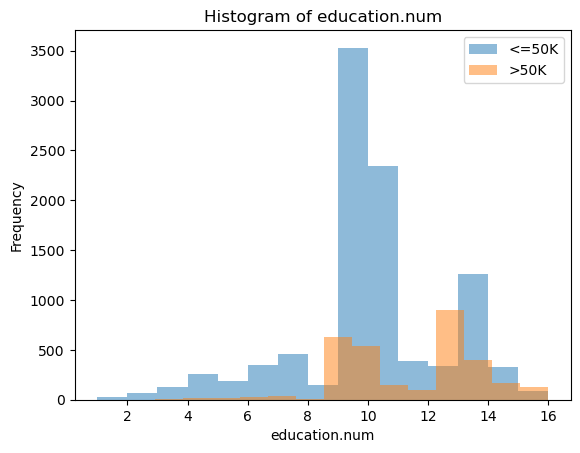

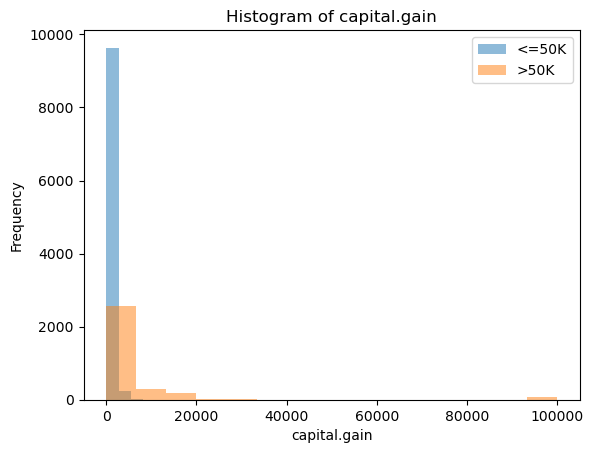

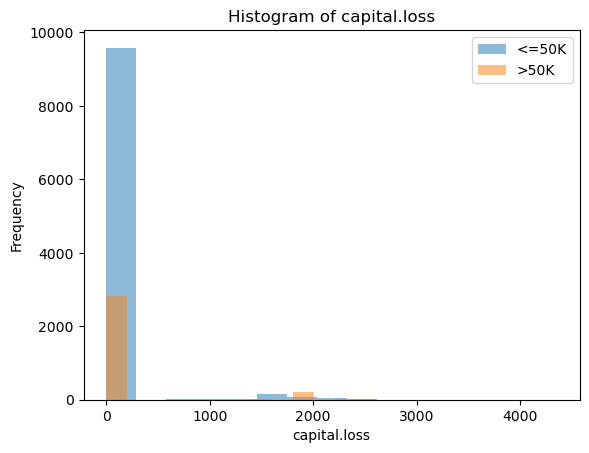

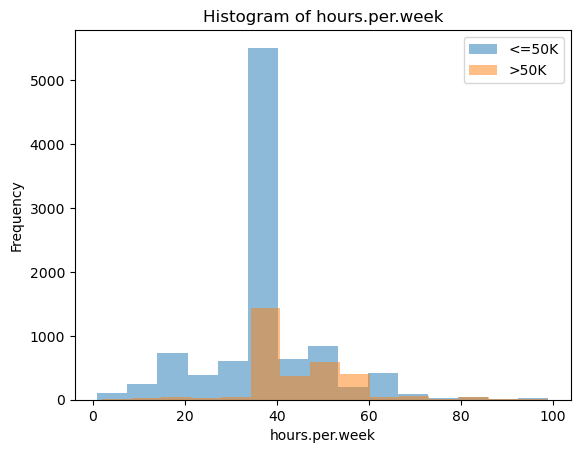

In [11]:
for feat in numeric_cols:
    ax = train_df.groupby("income")[feat].plot.hist(bins=15, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Identify transformations to apply

_Points: 13_

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. An example explanation is given for the age column. 

> Note: This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below. 

<div class="alert alert-warning">

Solution_2.3
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling |  A numeric feature with no missing values. Good idea to apply scaling, as the range of values (17 to 90) is quite different compared to other numeric features.|
| workclass | imputation, one-hot encoding | Imputation to fill in the missing values. One-hot encoding used to convert the categorical data into a binary matrix suitable for machine learning. |
| fnlwgt | drop | Weight value not useful for the classification task at hand. |
| education | ordinal encoding | Ordinal encoding is appropriate because education levels have an inherent hierarchy |
| education.num | drop | Redundant to the ordinally encoded education feature|
| marital.status | one-hot encoding  | Because this is a categorical feature with no inherent ordering, we use one-hot encoding |
| occupation | imputation, one-hot encoding  | Imputation to fill in the missing values. We use one-hot encoding to convert the categorical feature into a binary matrix |
| relationship | one-hot encoding  | Again a categorical feature with no inherent ordering, so we use one-hot encoding to convert it into a binary matrix |
| race | drop  | Not important (or ethical) enough to include in this classification problem |
| sex | one-hot encoding with "binary=True" |As a binary categorical feature, we can use one-hot encoding with Binary = True to convert it into a binary format our model can use.|
| capital.gain | scaling | Numeric feature with a large range of values, it makes sense to scale to normalize the value and avoid it from dominating other features.| 
| capital.loss | scaling | Numeric feature with a large range of values, it makes sense to scale to normalize the value and avoid it from dominating other features. |
| hours.per.week | scaling |Numeric feature with a smaller range of values, it makes sense to scale to normalize the value and make sure it is not dominate in our model. |
| native.country | imputation, one-hot encoding | Imputation to fill in the missing values. As a categorical feature with no inherent ordering,  we use one-hot encoding to convert it into a binary matrix | 


### 2.4 Identify feature types 

_Points: 5_

**Your tasks:**
1. Based on the types of transformations you want to apply on the features, identify different feature types and store them in the variables below as lists.  

<div class="alert alert-warning">
    
Solution_2.4
    
</div>

In [12]:
# Fill in the lists below.
numeric_features = ["age", "capital.gain", "capital.loss", "hours.per.week"]
categorical_features = ["native.country", "workclass", "marital.status", "occupation", "relationship",]
ordinal_features = ["education"]
binary_features = ["sex"]
drop_features = ["fnlwgt", "race", "education.num"]
target = "income"


<br><br><br><br>

## Exercise 3: Baseline models 

### 3.1 Separating feature vectors and targets  

_Points: 2_

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`. 

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

In [13]:
X_train = train_df.drop(columns=["income"])
y_train = train_df["income"]
X_test = test_df.drop(columns=["income"])
y_test = test_df["income"]

display(X_train)
display(y_train)
display(X_test)
display(y_test)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
27077,50,Federal-gov,32801,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,Amer-Indian-Eskimo,Female,0,0,40,United-States
11750,36,Local-gov,357720,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
278,32,Private,260954,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2042,30,United-States
12950,45,Private,162494,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,19,United-States
30767,43,Private,87284,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,31,NaN,672412,11th,7,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States
11039,70,Private,220589,Some-college,10,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,12,United-States
4220,21,Local-gov,309348,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,594,0,4,United-States
6682,48,Private,75104,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States


27077     >50K
11750    <=50K
278      <=50K
12950    <=50K
30767    <=50K
         ...  
5929     <=50K
11039    <=50K
4220     <=50K
6682     <=50K
31732     >50K
Name: income, Length: 13024, dtype: object

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
6860,21,Private,194723,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,Mexico
18542,47,Private,168262,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States
10365,19,Private,151506,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States
15177,36,Self-emp-not-inc,207202,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States
28303,44,Private,162108,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11360,24,Private,218678,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,49,United-States
7944,23,Private,208598,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States
1191,27,Private,37250,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1651,40,United-States
3664,50,Private,767403,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,40,United-States


6860     <=50K
18542    <=50K
10365    <=50K
15177    <=50K
28303    <=50K
         ...  
11360    <=50K
7944     <=50K
1191     <=50K
3664      >50K
30719    <=50K
Name: income, Length: 19537, dtype: object

<br><br>

### 3.2 Dummy classifier

_Points: 2_

**Your tasks:**

1. Carry out 5-fold cross-validation using `scikit-learn`'s `cross_validate` function with `return_train_scores=True` and store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold. 

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

In [14]:
dummy = DummyClassifier(strategy = "most_frequent")
scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
dummy_df = pd.DataFrame(scores)
display(dummy_df)

,fit_time,score_time,test_score,train_score
0,0.006007,0.004006,0.759693,0.759958
1,0.006006,0.003995,0.759693,0.759958
2,0.005002,0.004999,0.760077,0.759862
3,0.004999,0.003999,0.760077,0.759862
4,0.005001,0.004000,0.759985,0.759885


<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Discussion

_Points: 2_

**Your tasks:**

1. Hopefully, you were able to run cross-validation with dummy classifier successfully in the question above. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not? 

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

It won't work at this point because our data is not preprocessed yet; we have some categorical columns and some NaN values in numeric columns. We need to preprocess it first before feeding it into ML algorithms.

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 4: Preprocessing
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. In this exercise, first, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [15]:
numeric_transformer = StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

### 4.1 Preprocessing ordinal features

_Points: 5_

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

In [16]:
ordinal_transformer = OrdinalEncoder(categories=[['Preschool', 
                                                 '1st-4th',
                                                 '5th-6th',
                                                 '7th-8th',
                                                 '9th',
                                                 '10th',
                                                 '11th',
                                                 '12th',
                                                 'HS-grad',
                                                 'Prof-school',
                                                 'Assoc-voc',
                                                 'Assoc-acdm',
                                                 'Some-college',
                                                 'Bachelors',
                                                 'Masters',
                                                 'Doctorate']], dtype=int)

<br><br>

### 4.2 Preprocessing binary features

_Points: 2_

**Your tasks:**

1. Create a transformer called `binary_transformer` for our binary features.

> _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

In [17]:
binary_transformer = OneHotEncoder(drop="if_binary")

<br><br>

### 4.3 Preprocessing categorical features

_Points: 4_

In Exercise 2.3, we saw that there are 3 categorical features with missing values. So first we need to impute the missing values and then encode these features with one-hot encoding. For the purpose of this assignment, let's just have imputation as the first step for all categorical features even when they do not have missing values. This should be OK because if a feature doesn't have any missing value,  imputation won't be applied. 

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps: `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"` and `OneHotEncoder` with `handle_unknown="ignore"` and `sparse=False` for one-hot encoding. 

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

In [18]:
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(sparse_output=False, handle_unknown="ignore")
)


<br><br>

### 4.4 Creating a column transformer. 

_Points: 7_

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`. 

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

In [19]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)



In [20]:
transformed_df = preprocessor.fit_transform(X_train)
n_new_cols = transformed_df.shape[1] - X_train.shape[1]
print(n_new_cols)


70


<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [21]:
results_dict = {}  # dictionary to store all the results

In [22]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [23]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 42)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

C:\Users\thema\AppData\Local\Temp\ipykernel_27052\4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.037 (+/- 0.002),0.015 (+/- 0.001),0.760 (+/- 0.000),0.760 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

### 5.1 Trying different classifiers

_Points: 10_

**Your tasks:**

1. For each of the models in the starter code below: 
    - Define a pipeline with two steps: `preprocessor` from 4.4 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline and get the mean cross-validation scores with std by calling the `mean_std_cross_val_scores` function above. 
    - Store the results in a dataframe called `income_pred_results_df` with the model names in the `models` dictionary below as the index and each row representing results returned by `mean_std_cross_val_scores` function above. In other words, `income_pred_results_df` should look similar to the `results_df` dataframe above with more rows for the models below. 
    
> This might take a while to run. Be patient! 

In [24]:
models = {
    "decision tree": DecisionTreeClassifier(random_state=42),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=42),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

In [25]:
income_pred_results = {}

for model_name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    mean_score = mean_std_cross_val_scores(pipeline, X_train, y_train, return_train_score=True)
    income_pred_results[model_name] = mean_score

income_pred_results_df = pd.DataFrame(income_pred_results).T

C:\Users\thema\AppData\Local\Temp\ipykernel_27052\4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
C:\Users\thema\AppData\Local\Temp\ipykernel_27052\4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
C:\Users\thema\AppData\Local\Temp\ipykernel_27052\4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

In [26]:
display(income_pred_results_df)

,fit_time,score_time,test_score,train_score
decision tree,0.094 (+/- 0.008),0.013 (+/- 0.001),0.810 (+/- 0.011),0.986 (+/- 0.000)
kNN,0.040 (+/- 0.006),0.102 (+/- 0.094),0.827 (+/- 0.006),0.880 (+/- 0.002)
RBF SVM,2.455 (+/- 0.120),1.018 (+/- 0.017),0.850 (+/- 0.004),0.851 (+/- 0.002)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.2 Discussion 

_Points: 5_

**Your tasks:**

1. Examine the train and validation accuracies and `fit` and `score` times for all the models in the results above. How do the validation accuracies compare to the `DummyClassifier` model? Which model has the best validation accuracy? Which model is the fastest one? Which model is overfitting the most and the least?  


<div class="alert alert-warning">
    
Solution_5.2
    
</div>

The validation accuracies are all significantly better than the DummyClassifier model. The RBF SVM model has the best validation accuracy, but takes the longest to run. The kNN model is the fastest to run followed closely by the decision tree. The fit time of decision tree is slower, while the score time of the kNN classifier is slower The decision tree is the most overfit, while the RBF SVM model is the least overfit.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.3 Hyperparameter optimization

_Points: 10_

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.4 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the best CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient. 

In [27]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid

{'C': array([  0.1,   1. ,  10. , 100. ])}

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

In [28]:
results_dict = {"C":[], "mean_cv_score":[]}
best_C = 0
best_score = 0
for C in param_grid["C"]:
    pipe_svm = make_pipeline(preprocessor, SVC(C=C))
    scores = cross_val_score(pipe_svm, X_train, y_train)
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_C = C
    results_dict["C"].append(C)
    results_dict["mean_cv_score"].append(mean_score)

In [29]:
results_dict = pd.DataFrame(results_dict).transpose()
display(results_dict)

,0,1,2,3
C,0.100000,1.000000,10.000000,100.000000
mean_cv_score,0.831311,0.849739,0.852195,0.852426


_Type your answer here, replacing this text._

In [30]:
print(f"best C = {best_C}")
print("Yes, this value is different from the default value of 1.0")

best C = 100.0
Yes, this value is different from the default value of 1.0


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 6: Evaluating on the test set 
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 6.1 Scoring on the unseen test set 

_Points: 4_

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.4 as the first step and the best performing SVC model from 5.4 as the second step. 
2. Train the pipeline on the entire training set `X_train` and `y_train`. 
3. Score the pipeline on `X_test` and `y_test` and store the score in a variable called `test_score`.  

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

In [31]:
final_pipeline = make_pipeline(preprocessor, SVC(C=100))
final_pipeline.fit(X_train, y_train)

test_score = final_pipeline.score(X_test, y_test)
print(test_score)

0.8518196243026053


The final test score is 0.8482878640528229

<br><br><br><br>

## Exercise 7: Short answer questions

<!-- BEGIN QUESTION -->

### 7.1 kNNs toy example

_Points: 3_

Suppose you want to get predictions using the $k$-nearest neighbour algorithm on the toy dataset below. 

$$ X = \begin{bmatrix}5 & 2\\4 & -2\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}0\\0\\1\\1\\1\\2\end{bmatrix}.$$

Suppose you are given a new data point $x=\begin{bmatrix} 0\\0\end{bmatrix}$.  

1. What would the model predict when $k=1$?
2. What would the model predict when $k=3$?
3. What would the model predict when $k=3$ if we were doing regression rather than classification? 

1. 1
2. 0
3. 1/3

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 7.2 Preprocessing

_Points: 8_

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. What are two advantages of using sklearn Pipelines? 
4. When is it appropriate to use sklearn `ColumnTransformer`? 

1. The scaler will be fit to the test data itself, learning the mean and SD from the test data. This is training on the the test data, which we should never do as it does not give us a good idea of our accuracy on unseen data.
2. It's important to follow the golden rule to avoid learning patterns from the testing data keep your validation accuracy objective. Violating the golden rule leads to overfitting, which can lead to a worse classifier.
3. Pipelines ensure that preprocessing steps are applied in a consistent manner, ensuring the same workflow is followed during training and when classifying new data. Pipelines are also convienent and very easy to reproduce as they can be stored in a single object.
4. You should use sklearn ColumnTransformer when you have different preproccessing requirements for different columns in your dataset. 

<!-- END QUESTION -->

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.